In [1]:
import pandas as pd
import sys

sys.path.append('src')

df = pd.read_csv("/home/hadih/repos/FIDS/data/processed/dataset.csv")

In [ ]:
df = df[: 200]

df.shape

In [2]:
import numpy as np
from sklearn.calibration import LabelEncoder

def random_sized_split(x: np.ndarray, y: np.ndarray, n: int):
    """
    random_sized_split: split data to random sizes.
    """

    def split(_x, _train_size):
        indices = np.arange(len(_x))
        np.random.shuffle(indices)

        split_idx = int(_train_size * len(_x))

        return _x[indices[:split_idx]], _x[indices[split_idx:]]

    split_percentage = 1 / n
    chunks = []
    x_next, y_next = x, y
    for _ in range(n - 1):
        x_chunk, x_next = split(x_next, split_percentage)
        y_chunk, y_next = split(y_next, split_percentage)
        chunks.append((x_chunk, y_chunk))
    if len(x_next):
        chunks.append((x_next, y_next))

    return chunks

encoder = LabelEncoder()
splits = random_sized_split(df.drop(['Label'], axis=1).values, encoder.fit_transform(
        df.Label.values
    ), 3)

del df

0     757297
4      76556
10     52959
2      42488
3       3432
7       2714
11      1955
6       1920
5       1874
1        670
12       524
14       212
9         13
13         8
8          3
dtype: int64


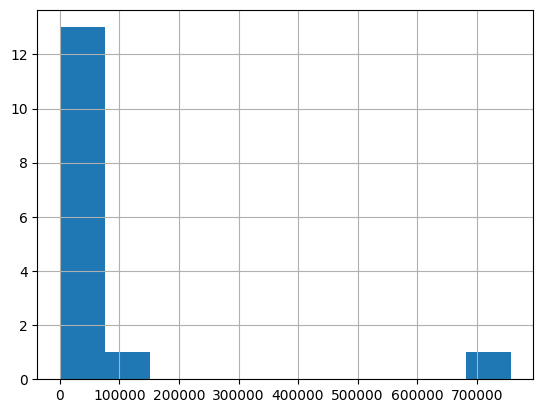

0     504722
4      51167
10     35309
2      28538
3       2257
7       1758
6       1293
11      1264
5       1185
1        445
12       335
14       133
9          5
13         4
8          2
dtype: int64


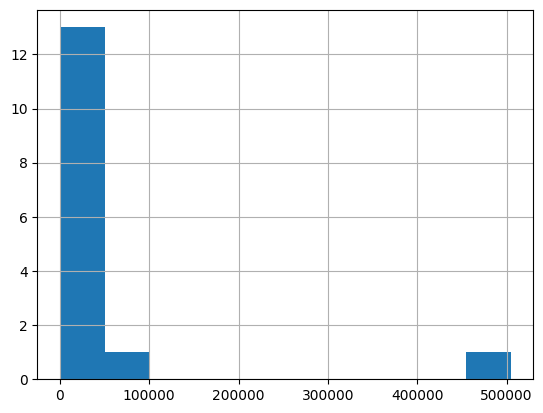

0     1009301
4      102401
10      70536
2       56999
3        4604
7        3463
11       2678
6        2583
5        2440
1         841
12        648
14        307
9          18
13          9
8           6
dtype: int64


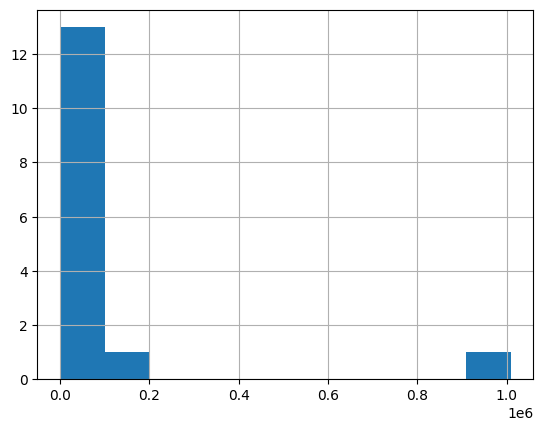

In [16]:
import matplotlib.pyplot as plt

for i, (x, y) in enumerate(splits):
    df = pd.DataFrame(y).value_counts()
    df.hist()
    print(df)
    plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827876 entries, 0 to 2827875
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [8]:
df['Label'].value_counts()

BENIGN                                                                                                                                                                                                                                                                                                                                                                                                                       2271320
DoS Hulk                                                                                                                                                                                                                                                                                                                                                                                                                      230124
PortScan                                                                                                                                                      

In [8]:
import joblib

v = joblib.load('../data/processed/test.pkl')
u = joblib.load('../data/processed/train.pkl')
c_pred = joblib.load('../data/final/centralized_predictions.pkl')

In [4]:
u['X'].shape, u['y'].shape

((2686482, 78), (2686482, 15))

In [5]:
v['X'].shape, v['y'].shape

((141394, 78), (141394, 15))

In [6]:
c_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print(classification_report(v['y'].argmax(axis=1), c_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113566
           1       0.99      0.78      0.87        98
           2       1.00      1.00      1.00      6401
           3       0.99      1.00      1.00       515
           4       1.00      1.00      1.00     11506
           5       0.99      0.99      0.99       275
           6       1.00      1.00      1.00       290
           7       1.00      1.00      1.00       397
           9       1.00      0.50      0.67         2
          10       0.99      1.00      1.00      7940
          11       1.00      1.00      1.00       295
          12       0.71      0.83      0.77        75
          13       1.00      1.00      1.00         1
          14       0.41      0.21      0.28        33

    accuracy                           1.00    141394
   macro avg       0.93      0.88      0.90    141394
weighted avg       1.00      1.00      1.00    141394



In [8]:
cm = confusion_matrix(v['y'].argmax(axis=1), c_pred.argmax(axis=1))

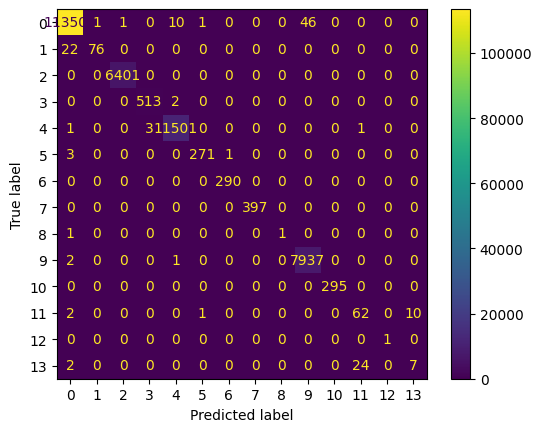

In [9]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()


In [3]:
import sys
import pandas as pd

sys.path.append('../../FIDS/src')

from config import FederatedLocation, Location

loc = FederatedLocation


print(loc.train_data, loc.get_client(3))

data/processed/train.pkl data/processed/federated_clients/client_3.pkl


In [37]:
import joblib
train = joblib.load("../" + loc.train_data)

In [39]:
data, target = pd.DataFrame(train['X']), pd.Series(train['y'].argmax(1))

In [40]:
target

0           0
1           0
2           0
3           0
4           0
           ..
2686477    11
2686478     0
2686479     0
2686480     0
2686481     0
Length: 2686482, dtype: int64

In [34]:
client0 = joblib.load('../' + loc.get_client(1))

In [35]:
import pandas as pd

client0['X'].shape, len(client0['y']), client0['y']

((850759, 78),
 850759,
 0          0
 2          0
 3          0
 7          0
 8          0
           ..
 2686467    0
 2686473    0
 2686474    0
 2686476    0
 2686479    0
 Length: 850759, dtype: int64)

In [36]:
client0['y']

0          0
2          0
3          0
7          0
8          0
          ..
2686467    0
2686473    0
2686474    0
2686476    0
2686479    0
Length: 850759, dtype: int64

In [10]:
splits = []
for index, class_id in enumerate(target.unique()):
    indexes = list(range(len(data)))
    
    class_related = data[data.index.isin(target[target == class_id].index)]
    print(class_related.shape[0], f'label: {class_id}')

2049879 label: 0
207826 label: 4
143309 label: 10
1377 label: 12
115538 label: 2
7163 label: 7
9278 label: 3
4969 label: 5
5301 label: 11
5228 label: 6
1751 label: 1
595 label: 14
32 label: 9
19 label: 13
10 label: 8


In [40]:
import numpy as np
t = np.array([[[1], [2], [3]],[[11], [22], [33]], [[41], [42], [453]], [[51], [52], [53]]])
t[:, 0].tolist()

[[1], [11], [41], [51]]

In [52]:
np.random.shuffle(t)
t

array([[[ 51],
        [ 52],
        [ 53]],

       [[ 41],
        [ 42],
        [453]],

       [[ 11],
        [ 22],
        [ 33]],

       [[  1],
        [  2],
        [  3]]])

: 

In [37]:
np.empty((3, 1))

array([[2.52e-322],
       [2.57e-322],
       [2.62e-322]])

In [27]:
np.concatenate((t, [[4], [5], [6]]))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [7]:
def generator():
    for i in range(5):
        yield f'test: {i}'

gen = generator()

[t for t in gen]

['test: 0', 'test: 1', 'test: 2', 'test: 3', 'test: 4']